In [17]:
import rerun as rr
import rerun.experimental as rr_exp

import kornia as K
import numpy as np
import torch

In [18]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


download_image("https://github.com/kornia/data/raw/main/arturito.jpg")

'arturito.jpg'

In [19]:
img_rgb_tensor = K.io.load_image("arturito.jpg", K.io.ImageLoadType.RGB32, device="cpu")

img_rgb_tensor

tensor([[[0.9412, 0.9412, 0.9412,  ..., 0.9412, 0.9412, 0.9412],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6471, 0.6471, 0.6471,  ..., 0.6471, 0.6471, 0.6471],
         [0.6431, 0.6431, 0.6431,  ..., 0.6431, 0.6431, 0.6431],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.9412, 0.9412, 0.9412],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6471, 0.6471, 0.6471,  ..., 0.6471, 0.6471, 0.6471],
         [0.6431, 0.6431, 0.6431,  ..., 0.6431, 0.6431, 0.6431],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.9412, 0.9412, 0.9412],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [20]:
rr.init("Kornia experiment")
rr.start_web_viewer_server()

[2023-06-02T06:51:27Z INFO  re_web_viewer_server] Started web server on http://localhost:50339
[2023-06-02T06:51:27Z INFO  re_web_viewer_server] Shutting down web server on http://localhost:64305


In [21]:
rec = rr.memory_recording()
rr.log_image("image", K.tensor_to_image(img_rgb_tensor))
rec

In [22]:
import cv2
import kornia as K
import numpy as np
import torch
from matplotlib import pyplot as plt

(-0.5, 255.5, 143.5, -0.5)

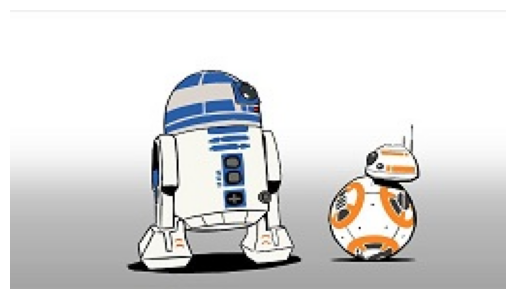

In [23]:
img_bgr: np.array = cv2.imread("arturito.jpg")  # HxWxC / np.uint8
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")

(-0.5, 255.5, 143.5, -0.5)

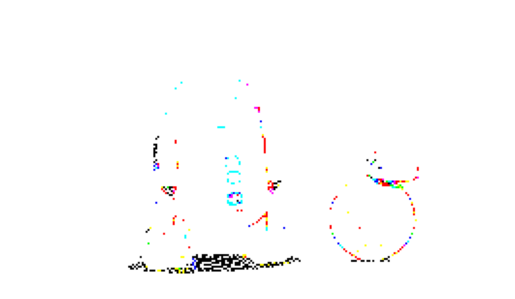

In [30]:
plt.imshow(img_rgb.astype(np.float64))
plt.axis("off")